# Bharat Intern Internship Task by Hardik Panchal

# Task 1 : Stock Prediction

# Problem Statement:
## Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

# About the Dataset:
## One popular source is Yahoo Finance, which provides historical stock price data for a wide range of companies. Here we need to replace 'AAPL' with the stock symbol of the company you want to analyze. This code will download historical stock price data for that company from January 1, 2010, to January 1, 2023.

In [2]:
pip install yfinance

  Using cached yfinance-0.2.28-py2.py3-none-any.whl (65 kB)
  Using cached lxml-4.9.3-cp38-cp38-win_amd64.whl (3.9 MB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.3.8-cp38-cp38-win_amd64.whl (35 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and date range
stock_symbol = 'AAPL'  # Replace with the symbol of the company you're interested in
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download stock price data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv('stock_data.csv')


[*********************100%%**********************]  1 of 1 completed


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your stock price data using pandas
# For this example, let's assume you have a CSV file named 'stock_data.csv'
data = pd.read_csv('stock_data.csv')

C:\Users\Hardi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [6]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [7]:
sequence_length = 10  # Adjust this based on your preference
sequences = []
labels = []
for i in range(len(data_scaled) - sequence_length):
    sequences.append(data_scaled[i : i + sequence_length])
    labels.append(data_scaled[i + sequence_length])

X = np.array(sequences)
y = np.array(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
82/82 [==============================] - 3s 15ms/step - loss: 0.0051
Epoch 2/50
82/82 [==============================] - 1s 15ms/step - loss: 5.9870e-05
Epoch 3/50
82/82 [==============================] - 1s 14ms/step - loss: 4.7508e-05
Epoch 4/50
82/82 [==============================] - 1s 13ms/step - loss: 4.6888e-05
Epoch 5/50
82/82 [==============================] - 1s 13ms/step - loss: 4.7594e-05
Epoch 6/50
82/82 [==============================] - 1s 13ms/step - loss: 4.3389e-05
Epoch 7/50
82/82 [==============================] - 1s 13ms/step - loss: 4.3012e-05
Epoch 8/50
82/82 [==============================] - 1s 13ms/step - loss: 4.2624e-05
Epoch 9/50
82/82 [==============================] - 1s 12ms/step - loss: 4.1412e-05
Epoch 10/50
82/82 [==============================] - 1s 13ms/step - loss: 4.3260e-05
Epoch 11/50
82/82 [==============================] - 1s 12ms/step - loss: 4.2015e-05
Epoch 12/50
82/82 [==============================] - 1s 14ms/step - loss: 4.15

In [11]:
y_pred = model.predict(X_test)

21/21 [==============================] - 0s 2ms/step


In [12]:
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

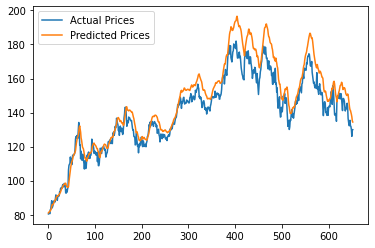

In [13]:
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(y_pred_actual, label='Predicted Prices')
plt.legend()
plt.show()